# objective Analysis

- what is sales trend?
- what are to 10 products by the sale?
- what are most salling products?
- what is most preffered ship mode?
- Most profitable category?

# Importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sb

# Import Sales Data

In [2]:
df=pd.read_excel('superstore_sales.xlsx')

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


# checking Null values

In [4]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# Data overview

In [5]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [7]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [8]:
df.shape

(51290, 21)

# Exploratry Data Analysis

In [9]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [10]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [11]:
df['month_year']=df['order_date'].apply(lambda x: x.strftime('%y_%m'))

In [12]:
df['month_year']

0        11_01
1        11_01
2        11_01
3        11_01
4        11_01
         ...  
51285    14_12
51286    14_12
51287    14_12
51288    14_12
51289    14_12
Name: month_year, Length: 51290, dtype: object

# - Monthly Sales Trends

In [13]:
# DAta Grouping based on months
month_trend=df.groupby('month_year')

In [14]:
# DAta Grouping based on months trend
month_trend.sum('sales').head()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
11_01,98898.48886,1463,68.758,8321.80096,10544.7880,870763
11_02,91152.15698,1224,52.252,12417.90698,10681.1630,760158
11_03,145729.36736,1836,74.212,15303.56826,13096.1855,1083929
11_04,116915.76418,2020,80.782,12902.32438,12954.5200,1134204
11_05,146747.83610,2013,82.382,12183.82870,16443.2060,1138226


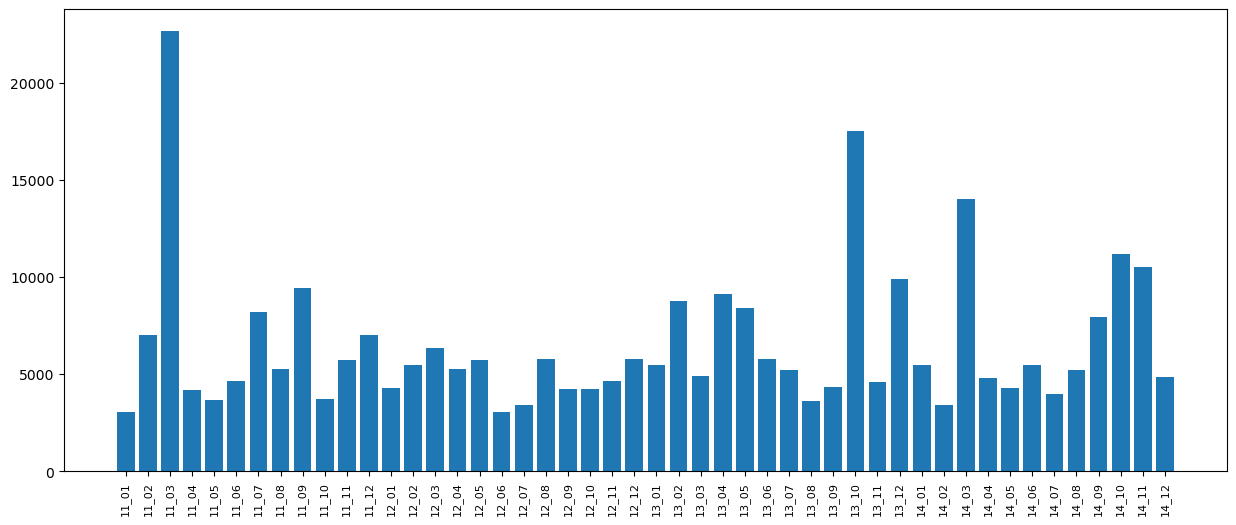

In [15]:
plt.figure(figsize=(15,6))
plt.bar(df['month_year'],df['sales'])
plt.xticks(rotation='vertical', size=8)
plt.show()

- # Top 10 Products by sale

In [16]:
products_group=df.groupby('product_name')

In [17]:
top_10=products_group.sum('sales').head(5)
top_10

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"""While you Were Out"" Message Book, One Form per Page",25.228,8,0.4,10.3880,3.10,6042
"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09,8052
#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43,8053
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03,14088
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95,20124


In [18]:
top_10.sort_values('sales', ascending=False)

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03,14088
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95,20124
#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43,8053
"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09,8052
"""While you Were Out"" Message Book, One Form per Page",25.228,8,0.4,10.3880,3.10,6042


# - Top 10 Products by Quantity

In [19]:
product_group=df.groupby('product_name')

In [20]:
product_group.sum('quantity').head(5)

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"""While you Were Out"" Message Book, One Form per Page",25.228,8,0.4,10.3880,3.10,6042
"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09,8052
#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43,8053
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03,14088
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95,20124


In [21]:
product_group=top_10.sort_values('quantity', ascending=False)

In [22]:
product_group[0:10]

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95,20124
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03,14088
"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09,8052
#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43,8053
"""While you Were Out"" Message Book, One Form per Page",25.228,8,0.4,10.3880,3.10,6042
